In [103]:
import simpy
from lib.core import NetworkTap, Switch, PacketSource, PacketSink#, visualize_topology
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

sns.set_style("white")
rng = np.random.default_rng()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Credits
The original idea and implementation for this exercise comes from the website of Greg Bernstein that can be viewed here: https://www.grotto-networking.com/DiscreteEventPython.html
Current implementation for 

# Uniform distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random

In [104]:
SIZE = 10000

In [105]:
x = rng.random(size=SIZE)
x, x.min(),x.mean(),x.max()

(array([0.82208259, 0.71462275, 0.68440608, ..., 0.75600169, 0.03981786,
        0.83687912]),
 8.462209968307377e-06,
 0.49603618118816656,
 0.9999501378679996)

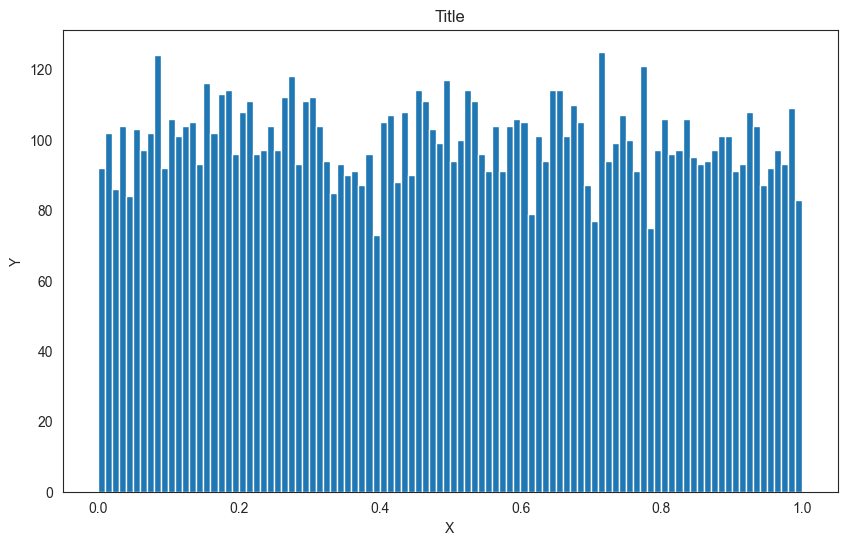

In [106]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x, bins=100)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Title")
plt.show()


# Exponential distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html

In [107]:
x = rng.exponential(scale=1, size=SIZE)
x, x.min(),x.mean(),x.max()

(array([1.03160104, 0.56527706, 0.5504568 , ..., 0.20828179, 0.62119097,
        0.6400795 ]),
 7.122766625471894e-05,
 1.0030041590168355,
 9.270754432383129)

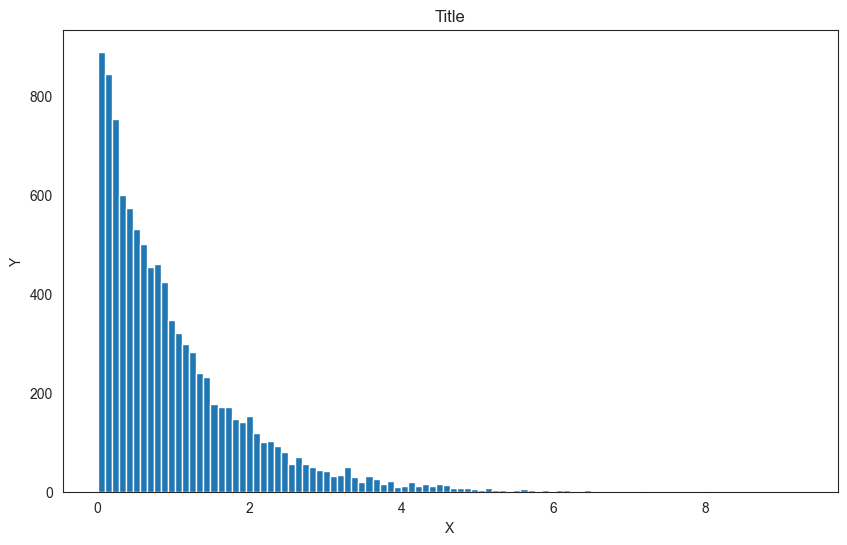

In [108]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x, bins=100)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Title")
plt.show()


# Normal distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html

In [109]:
x = rng.normal(loc=0, scale=1, size=SIZE)
x, x.min(),x.mean(),x.max()

(array([-0.9314076 ,  1.14352008, -1.21324683, ..., -0.29925332,
        -1.93739525,  0.07166717]),
 -3.7696364966758553,
 0.0051477359752930595,
 3.946882940120834)

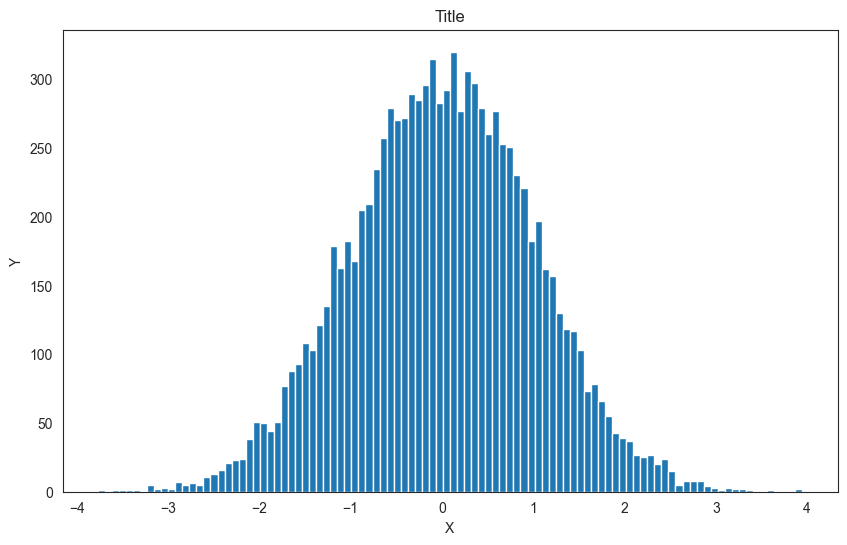

In [110]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x, bins=100)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Title")
plt.show()


# Simulation Source - Sink

In [111]:
# create Simpy environment
env = simpy.Environment()

# create simple sink for packets
sink = PacketSink(env, "sink", debug=True)

# create a packet source
source = PacketSource(
    env,
    "source01",
    packet_interval=1, # interval between individual packets in simulation units
    packet_size=10 # packet size in Bytes
)

# link them together
source.destination = sink

# run the simulation
simulation_time = 20
env.run(until=simulation_time)

2023-09-18T14:56:11.272648+0200 | INFO | PacketSink(sink_id=sink, logged_packets=     1). Arrival time   1.00. Processed: Packet(id=  1517, size= 10.00, source=source01)
2023-09-18T14:56:11.273648+0200 | INFO | PacketSink(sink_id=sink, logged_packets=     2). Arrival time   2.00. Processed: Packet(id=  1518, size= 10.00, source=source01)
2023-09-18T14:56:11.273648+0200 | INFO | PacketSink(sink_id=sink, logged_packets=     3). Arrival time   3.00. Processed: Packet(id=  1519, size= 10.00, source=source01)
2023-09-18T14:56:11.274648+0200 | INFO | PacketSink(sink_id=sink, logged_packets=     4). Arrival time   4.00. Processed: Packet(id=  1520, size= 10.00, source=source01)
2023-09-18T14:56:11.275652+0200 | INFO | PacketSink(sink_id=sink, logged_packets=     5). Arrival time   5.00. Processed: Packet(id=  1521, size= 10.00, source=source01)
2023-09-18T14:56:11.276648+0200 | INFO | PacketSink(sink_id=sink, logged_packets=     6). Arrival time   6.00. Processed: Packet(id=  1522, size= 10.0

## Task
* Modify the simulation code above to have 2 packet sources with varying sizes and interarrival times.
* Using the built-in partial function, experiment with the use of statistical distributions for packet sizes and interarrivals.

# Simulation Source - Switch - Sink

In [112]:
env = simpy.Environment()

sink = PacketSink(env, "sink", debug=True)

switch = Switch(
    env,
    "switch01",
    num_ports=4, # how many ports does the switch have. IMPORTANT: port is a bi-partisan connection so it actually represents 2 physical ports on a real-world switch
    port_capacity=100, # queue lenght in Bytes
    port_transmission_rate=1000 # bits/s
) 

source = PacketSource(env, "source01", packet_interval=partial(rng.normal, 2,0.5), packet_size=partial(rng.exponential, 50))


source.destination = switch.ports[0]
switch.ports[0].destination = sink

simulation_time = 200
env.run(until=simulation_time)

2023-09-18T14:56:11.357562+0200 | INFO | PacketSink(sink_id=sink, logged_packets=     1). Arrival time   4.23. Processed: Packet(id=  1537, size= 31.00, source=source01)
2023-09-18T14:56:11.358563+0200 | INFO | PacketSink(sink_id=sink, logged_packets=     2). Arrival time   6.09. Processed: Packet(id=  1538, size= 28.00, source=source01)
2023-09-18T14:56:11.358563+0200 | INFO | PacketSink(sink_id=sink, logged_packets=     3). Arrival time   7.12. Processed: Packet(id=  1539, size=  7.00, source=source01)
2023-09-18T14:56:11.358563+0200 | INFO | PacketSink(sink_id=sink, logged_packets=     4). Arrival time   9.35. Processed: Packet(id=  1540, size= 28.00, source=source01)
2023-09-18T14:56:11.359563+0200 | INFO | PacketSink(sink_id=sink, logged_packets=     5). Arrival time  11.61. Processed: Packet(id=  1541, size= 32.00, source=source01)
2023-09-18T14:56:11.360582+0200 | INFO | PacketSink(sink_id=sink, logged_packets=     6). Arrival time  14.59. Processed: Packet(id=  1542, size= 99.0

## How long were packets in the system? 

In [113]:
sink.delays, sink.arrivals, sink.interarrivals

([0.24799999999999978,
  0.2240000000000002,
  0.05600000000000005,
  0.2240000000000002,
  0.2560000000000002,
  0.7919999999999998,
  0.5440000000000005,
  0.4400000000000013,
  0.38400000000000034,
  0.46399999999999864,
  0.2959999999999994,
  0.2079999999999984,
  0.7680000000000007,
  0.008000000000002672,
  0.1599999999999966,
  0.240000000000002,
  0.031999999999996476,
  0.32800000000000296,
  0.2879999999999967,
  0.13600000000000279,
  0.4239999999999995,
  0.16799999999999926,
  0.1599999999999966,
  0.20000000000000284,
  0.3119999999999976,
  0.0799999999999983,
  0.4959999999999951,
  0.5040000000000049,
  0.1039999999999992,
  0.22400000000000375,
  0.2960000000000065,
  0.2879999999999967,
  0.6080000000000041,
  0.7759999999999962,
  0.28000000000000114,
  0.38400000000000034,
  0.15200000000000102,
  0.5919999999999987,
  0.11199999999999477,
  0.3359999999999985,
  0.12000000000000455,
  0.695999999999998,
  0.16800000000000637,
  0.3439999999999941,
  0.21599999999

# Simulation Source - Switch - Sink with Network Tap

In [114]:
env = simpy.Environment()

sink = PacketSink(env, "sink", debug=True)

switch = Switch(
    env,
    "switch01",
    num_ports=4, # how many ports does the switch have. IMPORTANT: port is a bi-partisan connection so it actually represents 2 physical ports on a real-world switch
    port_capacity=100, # queue lenght in Bytes
    port_transmission_rate=1000 # bits/s
)
tap = NetworkTap(
    env,
    port=switch.ports[0] # port to be monitored
)

source = PacketSource(env, "source01", packet_interval=partial(rng.normal, 2,0.5), packet_size=partial(rng.exponential, 50))


source.destination = switch.ports[0]
switch.ports[0].destination = sink

simulation_time = 200
env.run(until=simulation_time)

2023-09-18T14:56:11.550848+0200 | INFO | PacketSink(sink_id=sink, logged_packets=     1). Arrival time   1.95. Processed: Packet(id=  1632, size=  5.00, source=source01)
2023-09-18T14:56:11.551848+0200 | INFO | PacketSink(sink_id=sink, logged_packets=     2). Arrival time   4.47. Processed: Packet(id=  1633, size= 36.00, source=source01)
2023-09-18T14:56:11.552848+0200 | INFO | PacketSink(sink_id=sink, logged_packets=     3). Arrival time   6.90. Processed: Packet(id=  1634, size= 63.00, source=source01)
2023-09-18T14:56:11.552848+0200 | INFO | PacketSink(sink_id=sink, logged_packets=     4). Arrival time   8.74. Processed: Packet(id=  1635, size=  3.00, source=source01)
2023-09-18T14:56:11.553848+0200 | INFO | PacketSink(sink_id=sink, logged_packets=     5). Arrival time  13.23. Processed: Packet(id=  1637, size= 40.00, source=source01)
2023-09-18T14:56:11.553848+0200 | INFO | PacketSink(sink_id=sink, logged_packets=     6). Arrival time  16.00. Processed: Packet(id=  1638, size= 31.0

In [115]:
tap

NetworkTap(Last 10 packet counts=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], last 10 byte counts=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# M/M/1 System

Last 10 waits: 0.997, 0.676, 0.984, 2.056, 0.854, 0.075, 0.623, 0.258, 1.465, 1.454
Last 10 queue sizes: [0, 1, 0, 2, 3, 1, 1, 1, 1, 1]
Last 10 sink arrival times: 0.393, 0.414, 1.566, 1.085, 3.754, 0.541, 5.264, 2.522, 3.708, 0.032
average wait = 1.378
received: 4062, dropped 0, sent 4062
loss rate: 0.0
average system occupancy: 0.691


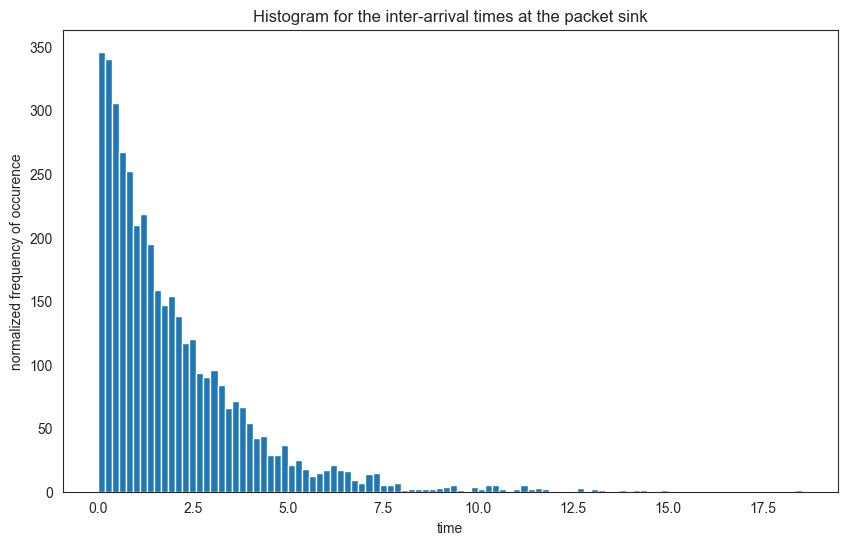

In [116]:
import random
import functools
import simpy
import matplotlib.pyplot as plt
from lib.SimComponents import PacketGenerator, PacketSink, SwitchPort, PortMonitor

adist = functools.partial(random.expovariate, 0.5)
sdist = functools.partial(random.expovariate, 0.01)  # mean size 100 bytes
samp_dist = functools.partial(random.expovariate, 1.0)
port_rate = 1000.0

env = simpy.Environment()  # Create the SimPy environment
# Create the packet generators and sink
ps = PacketSink(env, debug=False, rec_arrivals=True)
pg = PacketGenerator(env, "Greg", adist, sdist)
switch_port = SwitchPort(env, port_rate, qlimit=10000)
# Using a PortMonitor to track queue sizes over time
pm = PortMonitor(env, switch_port, samp_dist)
# Wire packet generators, switch ports, and sinks together
pg.out = switch_port
switch_port.out = ps
# Run it
env.run(until=8000)
print("Last 10 waits: "  + ", ".join(["{:.3f}".format(x) for x in ps.waits[-10:]]))
print("Last 10 queue sizes: {}".format(pm.sizes[-10:]))
print("Last 10 sink arrival times: " + ", ".join(["{:.3f}".format(x) for x in ps.arrivals[-10:]]))
print("average wait = {:.3f}".format(sum(ps.waits)/len(ps.waits)))
print("received: {}, dropped {}, sent {}".format(switch_port.packets_rec, switch_port.packets_drop, pg.packets_sent))
print("loss rate: {}".format(float(switch_port.packets_drop)/switch_port.packets_rec))
print("average system occupancy: {:.3f}".format(float(sum(pm.sizes))/len(pm.sizes)))


fig, ax = plt.subplots(figsize=(10,6))
ax.hist(ps.arrivals, bins=100)
ax.set_xlabel("time")
ax.set_ylabel("normalized frequency of occurence")
ax.set_title("Histogram for the inter-arrival times at the packet sink")
plt.show()

# More complex systems of queues

In [117]:
"""
Use of SimComponents to simulate the network of queues from Homework #6 problem 1, Fall 2014.
See corresponding solution set for mean delay calculation based on Burkes theorem.

Copyright 2014 Dr. Greg M. Bernstein
Released under the MIT license
"""
import random
import functools

import simpy

from lib.SimComponents import PacketGenerator, PacketSink, SwitchPort, RandomBrancher


if __name__ == '__main__':
    # Set up arrival and packet size distributions
    # Using Python functools to create callable functions for random variates with fixed parameters.
    # each call to these will produce a new random value.
    mean_pkt_size = 100.0  # in bytes
    adist1 = functools.partial(random.expovariate, 2.0)
    adist2 = functools.partial(random.expovariate, 0.5)
    adist3 = functools.partial(random.expovariate, 0.6)
    sdist = functools.partial(random.expovariate, 1.0/mean_pkt_size)
    samp_dist = functools.partial(random.expovariate, 0.50)
    port_rate = 2.2*8*mean_pkt_size  # want a rate of 2.2 packets per second

    # Create the SimPy environment. This is the thing that runs the simulation.
    env = simpy.Environment()

    # Create the packet generators and sink
    def selector(pkt):
        return pkt.src == "SJSU1"

    def selector2(pkt):
        return pkt.src == "SJSU2"
    ps1 = PacketSink(env, debug=False, rec_arrivals=True, selector=selector)
    ps2 = PacketSink(env, debug=False, rec_waits=True, selector=selector2)
    pg1 = PacketGenerator(env, "SJSU1", adist1, sdist)
    pg2 = PacketGenerator(env, "SJSU2", adist2, sdist)
    pg3 = PacketGenerator(env, "SJSU3", adist3, sdist)
    branch1 = RandomBrancher(env, [0.75, 0.25])
    branch2 = RandomBrancher(env, [0.65, 0.35])
    switch_port1 = SwitchPort(env, port_rate)
    switch_port2 = SwitchPort(env, port_rate)
    switch_port3 = SwitchPort(env, port_rate)
    switch_port4 = SwitchPort(env, port_rate)

    # Wire packet generators, switch ports, and sinks together
    pg1.out = switch_port1
    switch_port1.out = branch1
    branch1.outs[0] = switch_port2
    switch_port2.out = branch2
    branch2.outs[0] = switch_port3
    branch2.outs[1] = switch_port4
    pg3.out = switch_port3
    pg2.out = switch_port4
    switch_port3.out = ps1
    switch_port4.out = ps2
    # Run it
    env.run(until=4000)
    print(ps2.waits[-10:])
    # print pm.sizes[-10:]
    # print ps.arrivals[-10:]
    print("average wait source 1 to output 3 = {}".format(sum(ps1.waits)/len(ps1.waits)))
    print("average wait source 2 to output 4 = {}".format(sum(ps2.waits)/len(ps2.waits)))
    print("packets sent {}".format(pg1.packets_sent + pg2.packets_sent))
    print("packets received: {}".format(len(ps2.waits)))
    #print("average system occupancy: {}".format(float(sum(pm.sizes))/len(pm.sizes)))


[0.427326032770452, 0.7451082096790742, 0.34161838908175923, 0.035197483472074964, 0.7080878428751021, 0.5987880432762722, 1.8792901808064926, 1.02567888200565, 2.0271710848246585, 0.26548597671217067]
average wait source 1 to output 3 = 7.428571353017342
average wait source 2 to output 4 = 0.8312662843419701
packets sent 9954
packets received: 1940
average system occupancy: 0.6909294512877939
